In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pmdarima --quiet
import pmdarima as pm
import re

In [4]:
# load the data
data = pd.read_csv('Nat_Gas.csv')

In [5]:
# preprocess the data
data['Dates'] = pd.to_datetime(data['Dates'])
data = data.set_index(['Dates'])

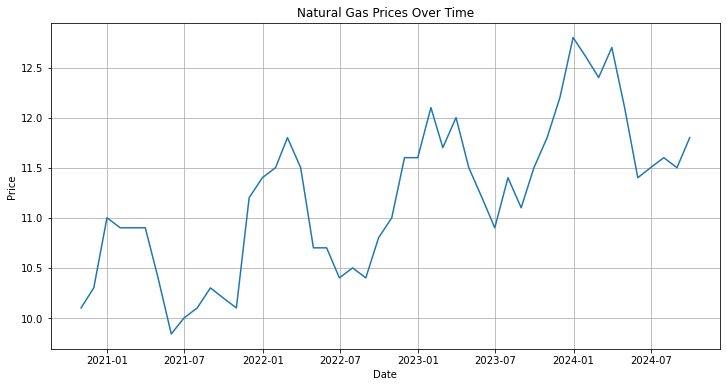

In [6]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Prices'])
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [11]:
def sarima_forecast(data, input_date_str, periods=24):
    # Fit a SARIMA model using auto_arima
    SARIMA_model = pm.auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0,
                             seasonal=True, d=None, D=1, trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)

    # Parse the input date
    input_date = pd.to_datetime(input_date_str)

    # Forecast for the input date and specified number of periods
    forecast = SARIMA_model.predict(n_periods=periods)
    
    # Extract the forecasted price for the input date
    input_date_index = pd.date_range(start=input_date, periods=1, freq='M')
    forecasted_price = forecast[input_date_index[0]]

    return forecasted_price

In [12]:
# Example usage:
input_date_str = "2025-10-1"  # Change to your desired input date
forecasted_price = sarima_forecast(data["Prices"], input_date_str)
forecasted_price

12.665000357304244

In [13]:
def plot_sarima_forecast(data, periods=12):
    # Fit a SARIMA model using auto_arima
    SARIMA_model = pm.auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0,
                                 seasonal=True, d=None, D=1, trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)

    # Forecast for the next 'periods' months
    n_periods = periods
    fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')

    # Create series for plotting purposes
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot the forecasted prices
    plt.figure(figsize=(15, 7))
    plt.plot(data, color='#1f76b4', label='Historical Prices')
    plt.plot(fitted_series, color='darkgreen', label='Forecasted Prices')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15, label='95% Confidence Interval')
    plt.title("Expected Prices")
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    return fitted

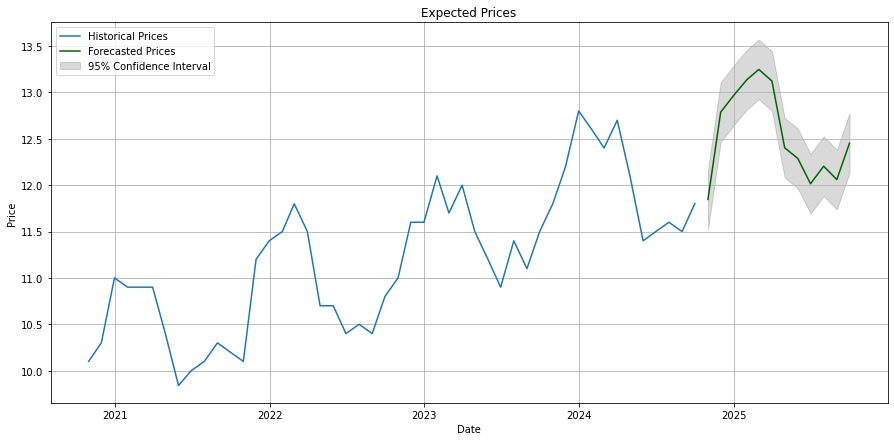

2024-10-31    11.845747
2024-11-30    12.786559
2024-12-31    12.969448
2025-01-31    13.137909
2025-02-28    13.247914
2025-03-31    13.122505
2025-04-30    12.402953
2025-05-31    12.288267
2025-06-30    12.015658
2025-07-31    12.204661
2025-08-31    12.060160
2025-09-30    12.453312
Freq: M, dtype: float64

In [14]:
plot_sarima_forecast(data['Prices'])